<a href="https://colab.research.google.com/github/LunaEyad/Deep-Learning-Foundations/blob/main/Lecture_4_~_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 4 ~ Stochastic Gradient Descent

In [ ]:


from random import Random
from math import sqrt, ceil
SEED =8
def generate_points(n = 1000):

    random_gen = Random(x = SEED)

    lst_x , lst_y =[],[]
    for _ in range(n):
        lst_x.append(random_gen.uniform(a = 0, b = 1))
   
    for _ in range(n):
        lst_y.append(random_gen.uniform(a = 0, b = 1))

    return lst_x, lst_y


data_x , data_y = generate_points()

def calc_grad(x_p,y_p, batch_x, batch_y):
  sum_x, sum_y= 0, 0
  for x_i ,y_i in zip( batch_x, batch_y):
    inv_sqr= ((x_i - x_p)**2 + (y_i - y_p)**2 )**(-0.5)
    sum_x+= inv_sqr * (x_i - x_p)
    sum_y+= inv_sqr * (y_i - y_p)
  return( -sum_x / len(batch_x), -sum_y / len(batch_y) )

def loss (x_p , y_p, batch_x, batch_y ):
  
  return(
      (1/len(batch_x)) * sum([
          sqrt((x_i-x_p)**2+(y_i-y_p)**2)
          for x_i,y_i in zip(data_x,data_y)
      ])
  ) 
  
losses_sgd , losses_gd =[],[] 
x_p_sgd=0.3
y_p_sgd=0.3
x_p=0.3
y_p=0.3
sampler=Random(x=SEED)
EPOCHS=100
BATCH_SZ=4
N=len(data_x)
NUM_BATCH=ceil(N/BATCH_SZ)
DELTA=1e-2
indices=[i for i in range(len(data_x))]

for _ in range (EPOCHS):
  sampler.shuffle(indices)
  #SGD
  for batch_ind in range(NUM_BATCH):
    batch_indices=indices[batch_ind*BATCH_SZ: (batch_ind+1)*BATCH_SZ]
    batch_x=[data_x[i] for i in batch_indices]
    batch_y=[data_y[i] for i in batch_indices]
    grad_x_sgd,grad_y_sgd= calc_grad(x_p_sgd,y_p_sgd,batch_x,batch_y)
    x_p_sgd-=grad_x_sgd* DELTA
    y_p_sgd-=grad_y_sgd* DELTA
    losses_sgd.append(loss(x_p_sgd,y_p_sgd,data_x,data_y))

  #GD
  grad_x, grad_y= calc_grad(x_p,y_p,data_x,data_y)
  x_p-=grad_x* DELTA
  y_p-=grad_y* DELTA
  losses_gd.append(loss(x_p,y_p,data_x,data_y))


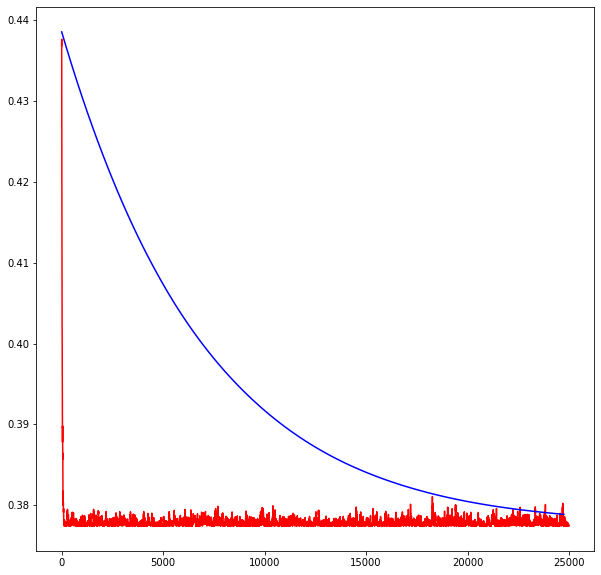

In [ ]:
from matplotlib.pyplot import figure
fig=figure(figsize=[10,10])
ax=fig.add_subplot(1,1,1)
ax.plot(losses_sgd ,"r")
ax.plot([i*NUM_BATCH for i in range(len(losses_gd)) ], losses_gd, "b")